In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as ax #for subplots 
import seaborn as sns

In [2]:
data=pd.read_csv('data_for_lr.csv')
data.head(5)

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [3]:
data.isnull().sum()

x    0
y    1
dtype: int64

In [4]:
data.dropna(inplace=True)
data.head(2)

,x,y
0,24.0,21.549452
1,50.0,47.464463


In [5]:
data.isnull().sum()

x    0
y    0
dtype: int64

In [6]:
data.shape

(699, 2)

<Axes: xlabel='x', ylabel='y'>

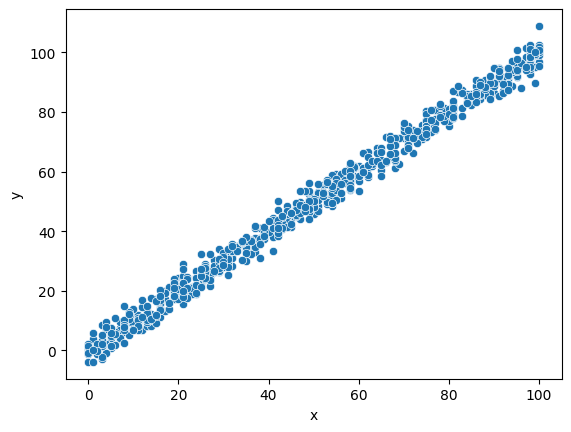

In [7]:
sns.scatterplot(x=data['x'],y=data['y'])

# Spliting tha data

In [8]:
#testing data
training_input=np.array(data.x[0:500]).reshape(500,1)
training_output=np.array(data.y[0:500]).reshape(500,1)
testing_input=np.array(data.x[500:699]).reshape(199,1)
testing_output=np.array(data.y[500:699]).reshape(199,1)
print(testing_input.shape)
print(testing_output.shape)

(199, 1)
(199, 1)


# forward propagation
y=m*x+c

In [9]:
def froward_propagation(training_input,parameter):
    m=parameter['m']
    c=parameter['c']
    predictions=np.multiply(m,training_input)+c
    return predictions

# cost function
cost=(y^-y)**2/2*n

In [10]:
def cost_predictions(predictions,training_output):
    cost=np.mean((predictions-training_output)**2)*0.5
    return cost

# gredent desent or backward propagation
df=(y-f(x))/n  or 
df=(f(x)-y)/n
dm=df*x
dc=df*1

In [11]:
def backward_propagation(training_input,training_output,prediction):
    derivatives=dict()
    df=np.mean(prediction-training_output)
    dm=np.multiply(df,training_input)
    dc=np.mean(df)
    derivatives['dm']=dm
    derivatives['dc']=dc
    return derivatives

# update parameter
m=m-(learning_rate*dm)
c=c-(learning_rate*dc)

In [12]:
def update_paramters(paramters,derivatives,learning_rate):
    paramters['m']=paramters['m']-learning_rate*derivatives['dm']
    paramters['c']=paramters['c']-learning_rate*derivatives['dc']
    return paramters

# Training Model


In [13]:
def trainig_Model(training_input,training_output,learning_rate,iters):
    #random initialization of the paramters
    parameters=dict()
    parameters['m']=np.random.uniform(0,1)
    parameters['c']=np.random.uniform(0,1)
    plt.figure(figsize=(1,1))
    loss=list()
    for i in range(iters):
        #step 1 forward propagation
        predictions=froward_propagation(training_input,parameters)
        
        #step 2 getting cost of the functions 
        cost=cost_predictions(predictions,training_output)
        loss.append(cost)
        #print("Iteration = {}, Loss = {}".format(i+1, cost))
        #plot
        if(i==iters-1):
            fig,ax=plt.subplots()
            ax.plot(training_input,training_output ,"+",label="Original data")
            ax.plot(training_input,predictions ,"*",label="Training data")
            legend = ax.legend()
            plt.plot(training_input,training_output ,"+",label="Original data")
            plt.plot(training_input,predictions ,"*",label="Training data")
            plt.show()
            
        
        #step 3 backward propagation or gredenent descent
        derivatives=backward_propagation(training_input,training_output,predictions)
        
        parameters=update_paramters(parameters,derivatives,learning_rate)
    return parameters,loss

# training data

<Figure size 100x100 with 0 Axes>

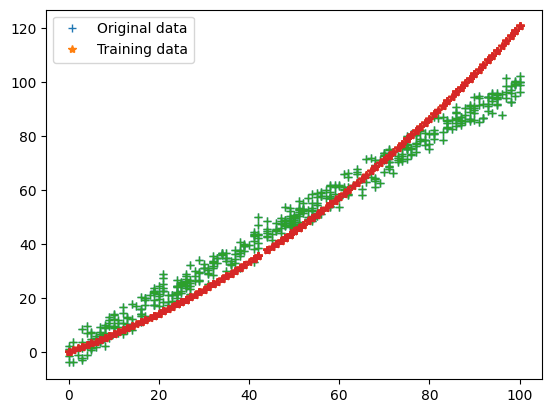

In [14]:
parameters,loss=trainig_Model(training_input,training_output,0.0001,40)

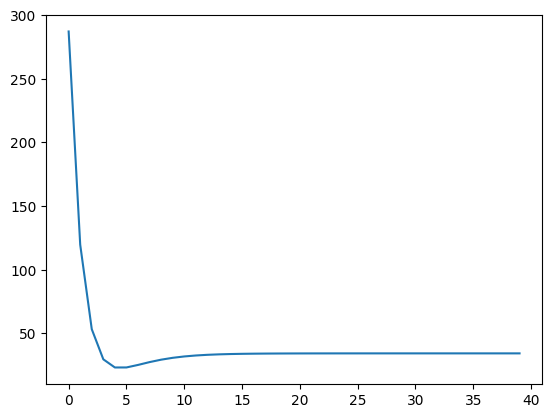

In [15]:
plt.plot(loss)